# 1. Data Analysis

In [2]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

from collections import Counter

In [5]:
# Function for read train and test data
def read_train_test(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test

In [6]:
train_path = "data/train.csv"

test_path = "data/test.csv"

train, test = read_train_test(train_path, test_path)

In [7]:
train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32999 entries, 0 to 32998
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32999 non-null  float64
 1   person_gender                   32999 non-null  object 
 2   person_education                32999 non-null  object 
 3   person_income                   32999 non-null  float64
 4   person_emp_exp                  32999 non-null  int64  
 5   person_home_ownership           32999 non-null  object 
 6   loan_amnt                       32999 non-null  float64
 7   loan_intent                     32999 non-null  object 
 8   loan_int_rate                   32999 non-null  float64
 9   loan_percent_income             32999 non-null  float64
 10  cb_person_cred_hist_length      32999 non-null  float64
 11  credit_score                    32999 non-null  int64  
 12  previous_loan_defaults_on_file  

There is no null values in the trainning data.

In [9]:
train.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [10]:
train.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,32999.000000,3.299900e+04,32999.000000,32999.000000,32999.000000,32999.000000,32999.000000,32999.000000,32999.000000
mean,27.738568,8.038576e+04,5.516470,9587.230310,11.001461,0.139147,5.811358,633.003697,0.215400
std,6.333872,7.425788e+04,6.333516,6317.895438,3.069164,0.086783,4.050483,50.379861,0.411106
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,23.000000,4.748550e+04,1.000000,5000.000000,8.490000,0.070000,3.000000,602.000000,0.000000
50%,26.000000,6.718800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.654300e+04,8.000000,12100.000000,13.110000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
test.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,27.834333,8.013774e+04,5.118333,9572.006417,11.020593,0.141313,6.021833,631.527583,0.241000
std,5.168312,9.534709e+04,5.239429,6307.116278,2.715026,0.088370,3.361195,50.575125,0.427708
min,20.000000,8.000000e+03,0.000000,563.000000,5.420000,0.000000,2.000000,418.000000,0.000000
25%,24.000000,4.671850e+04,1.000000,5000.000000,8.980000,0.070000,4.000000,600.000000,0.000000
50%,26.000000,6.647350e+04,4.000000,8000.000000,11.010000,0.120000,5.000000,638.000000,0.000000
75%,30.000000,9.461525e+04,7.000000,12389.250000,12.790000,0.190000,8.000000,669.000000,0.000000
max,116.000000,5.556399e+06,93.000000,35000.000000,20.000000,0.630000,30.000000,792.000000,1.000000


**Observation:**

1. Features having object data type are Categorical.
2. Features having int64 or float64 data type are Numerical.


In [12]:
# Split trainning data into categorical and numerical features

numerical_cols=[]
categorical_cols=[]

for col in train.columns:
    if train[col].dtype=='object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

if 'loan_status' in numerical_cols:
    numerical_cols.remove('loan_status')

print("Numerical Features:", numerical_cols)
print("Categorical Features:", categorical_cols)

Numerical Features: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Categorical Features: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


## Compare the train and test

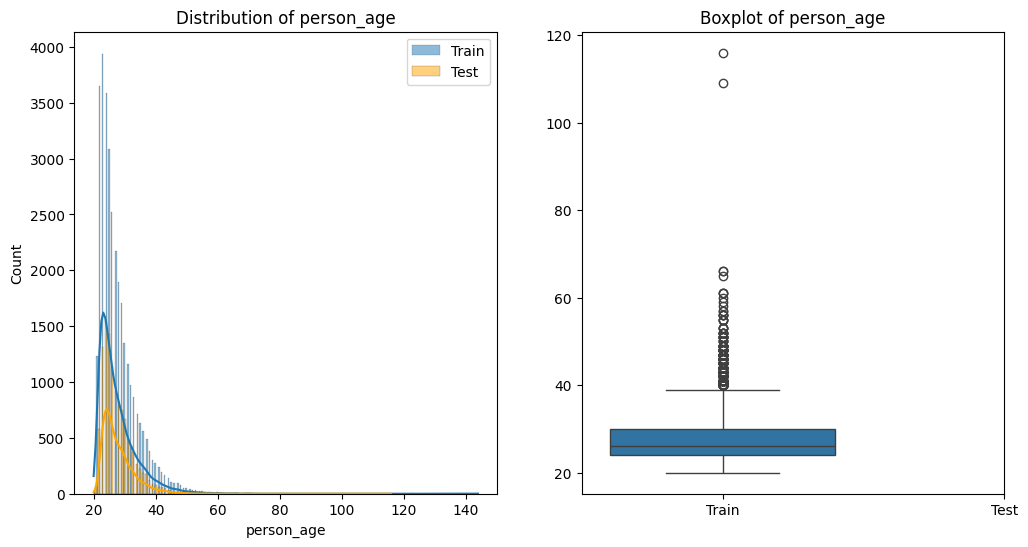

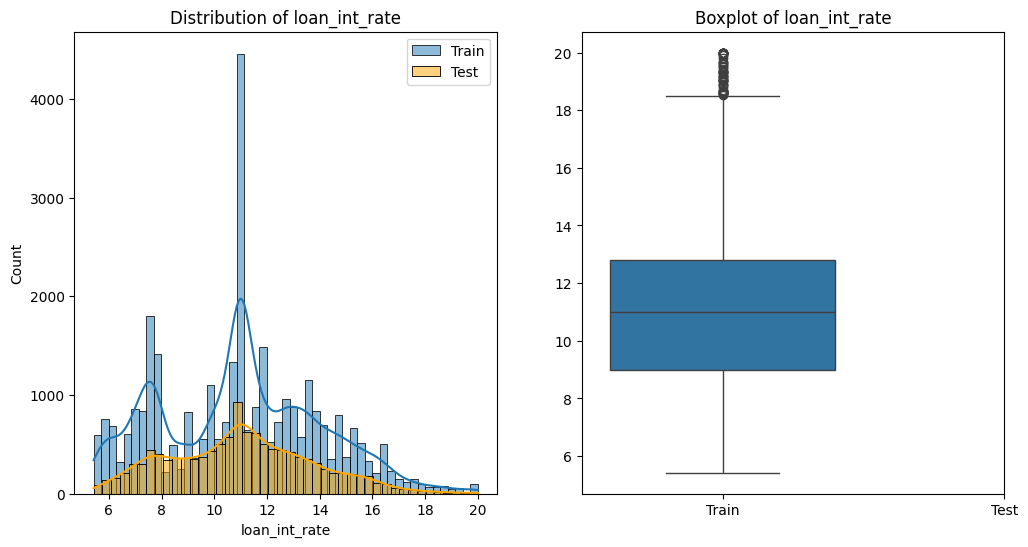

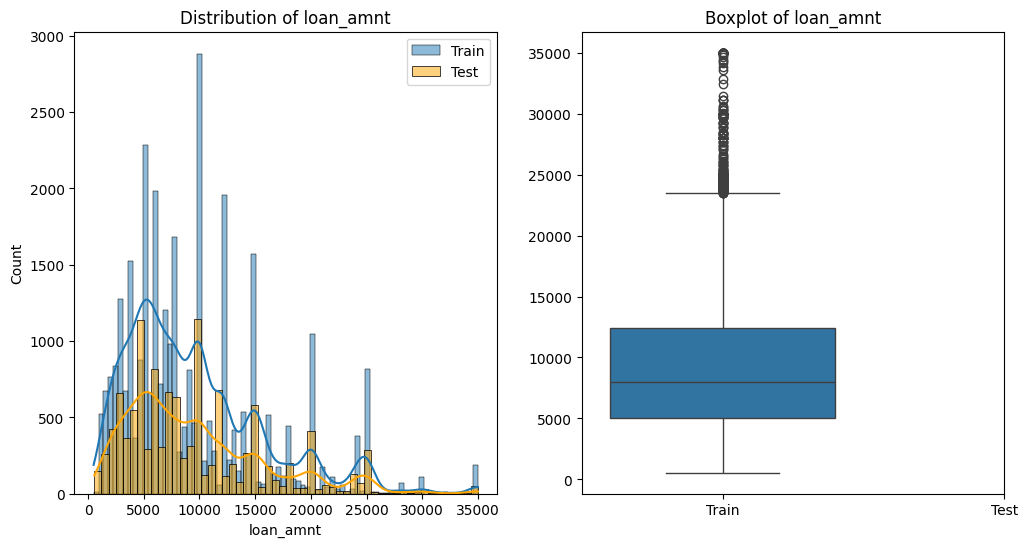

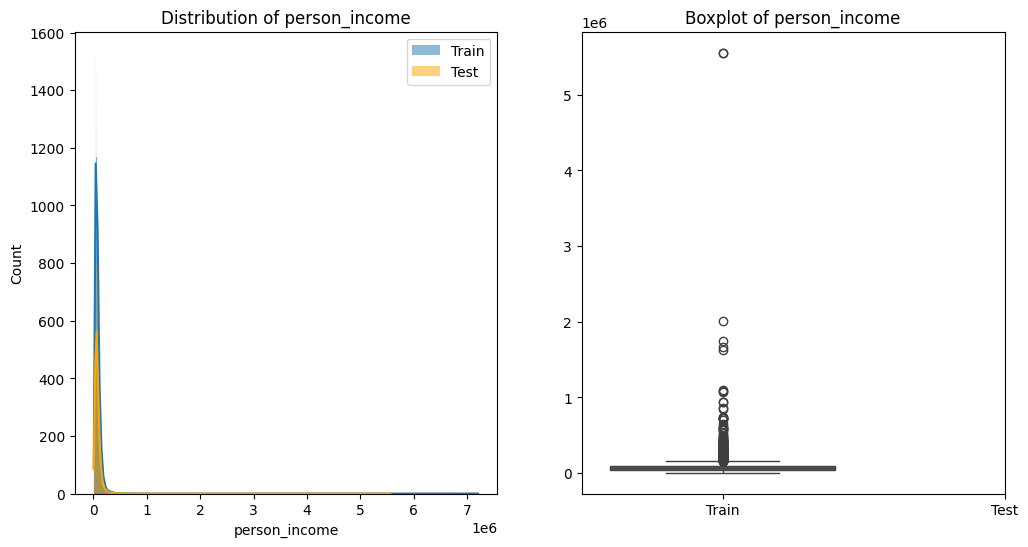

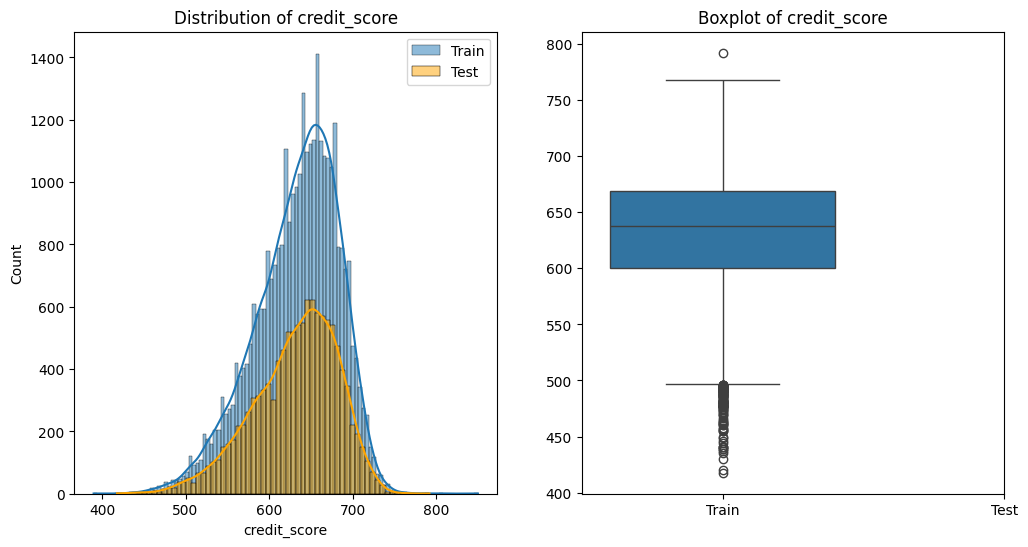

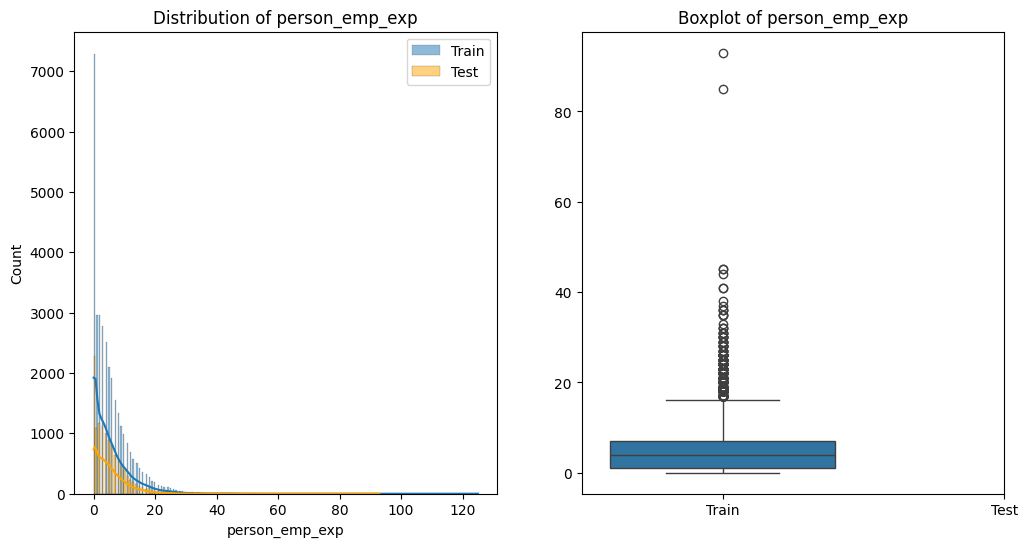

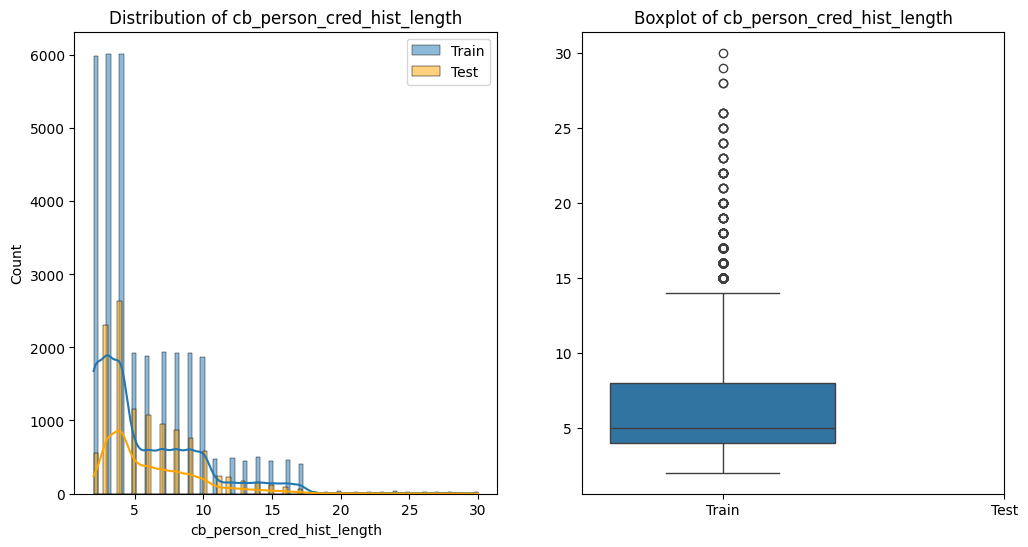

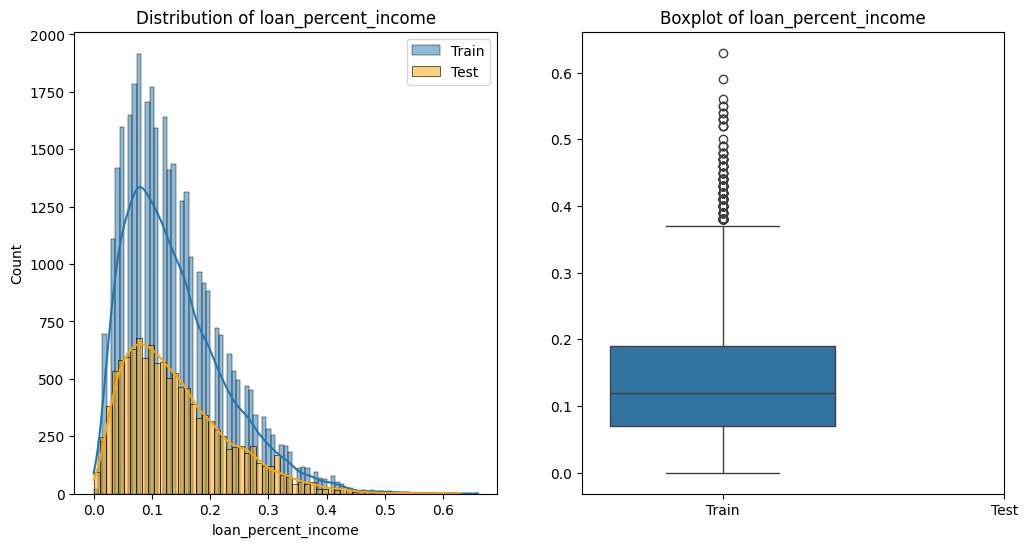

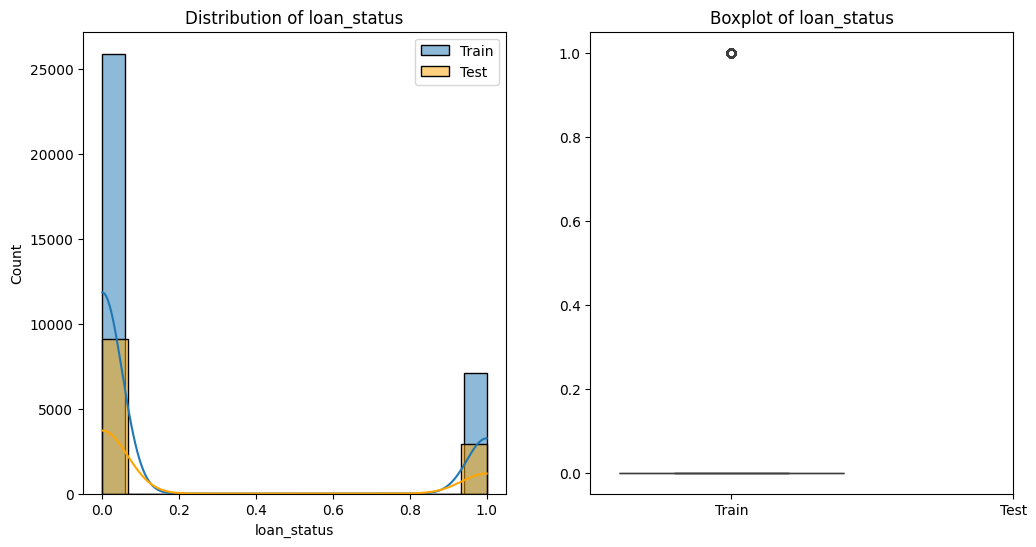

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns

numerical_cols = list(set(train.select_dtypes(include=['number']).columns) & set(test.select_dtypes(include=['number']).columns))
for col in numerical_cols:
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(train[col], label='Train', kde=True)
  sns.histplot(test[col], label='Test', kde=True, color='orange')
  plt.title(f'Distribution of {col}')
  plt.legend()
  plt.subplot(1, 2, 2)
  sns.boxplot(data=[train[col], test[col]])
  plt.title(f'Boxplot of {col}')
  plt.xticks([0, 1], ['Train', 'Test'])
  plt.show()

**Observation:** The outliers in age and emp_exp should be removed (age > 130 and emp_exp > 100)

## Plot the categorical features in trainning data


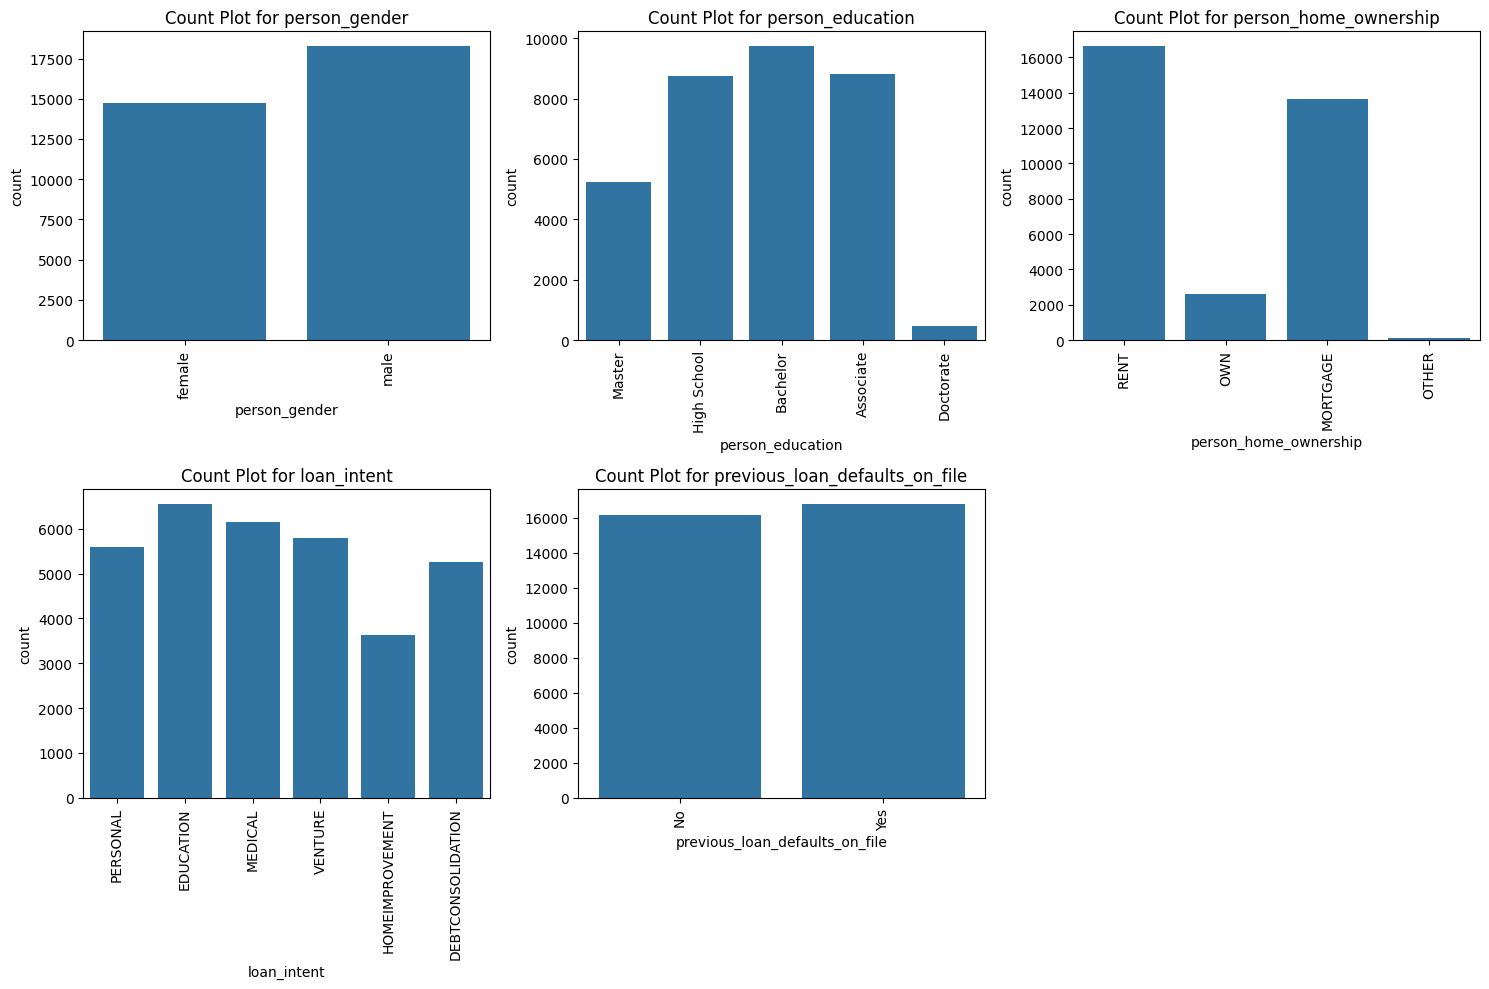

In [14]:
def plot_categorical_features(data, categorical_features):
    num_features = len(categorical_features)
    cols = 3
    rows = (num_features + cols - 1) // cols  

    plt.figure(figsize=(5 * cols, 5* rows))

    for i, column in enumerate(categorical_features):
        plt.subplot(rows, cols, i + 1)
        sns.countplot(data=data, x=column)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

plot_categorical_features(train, categorical_cols)

## Plot the numerical features in trainning data


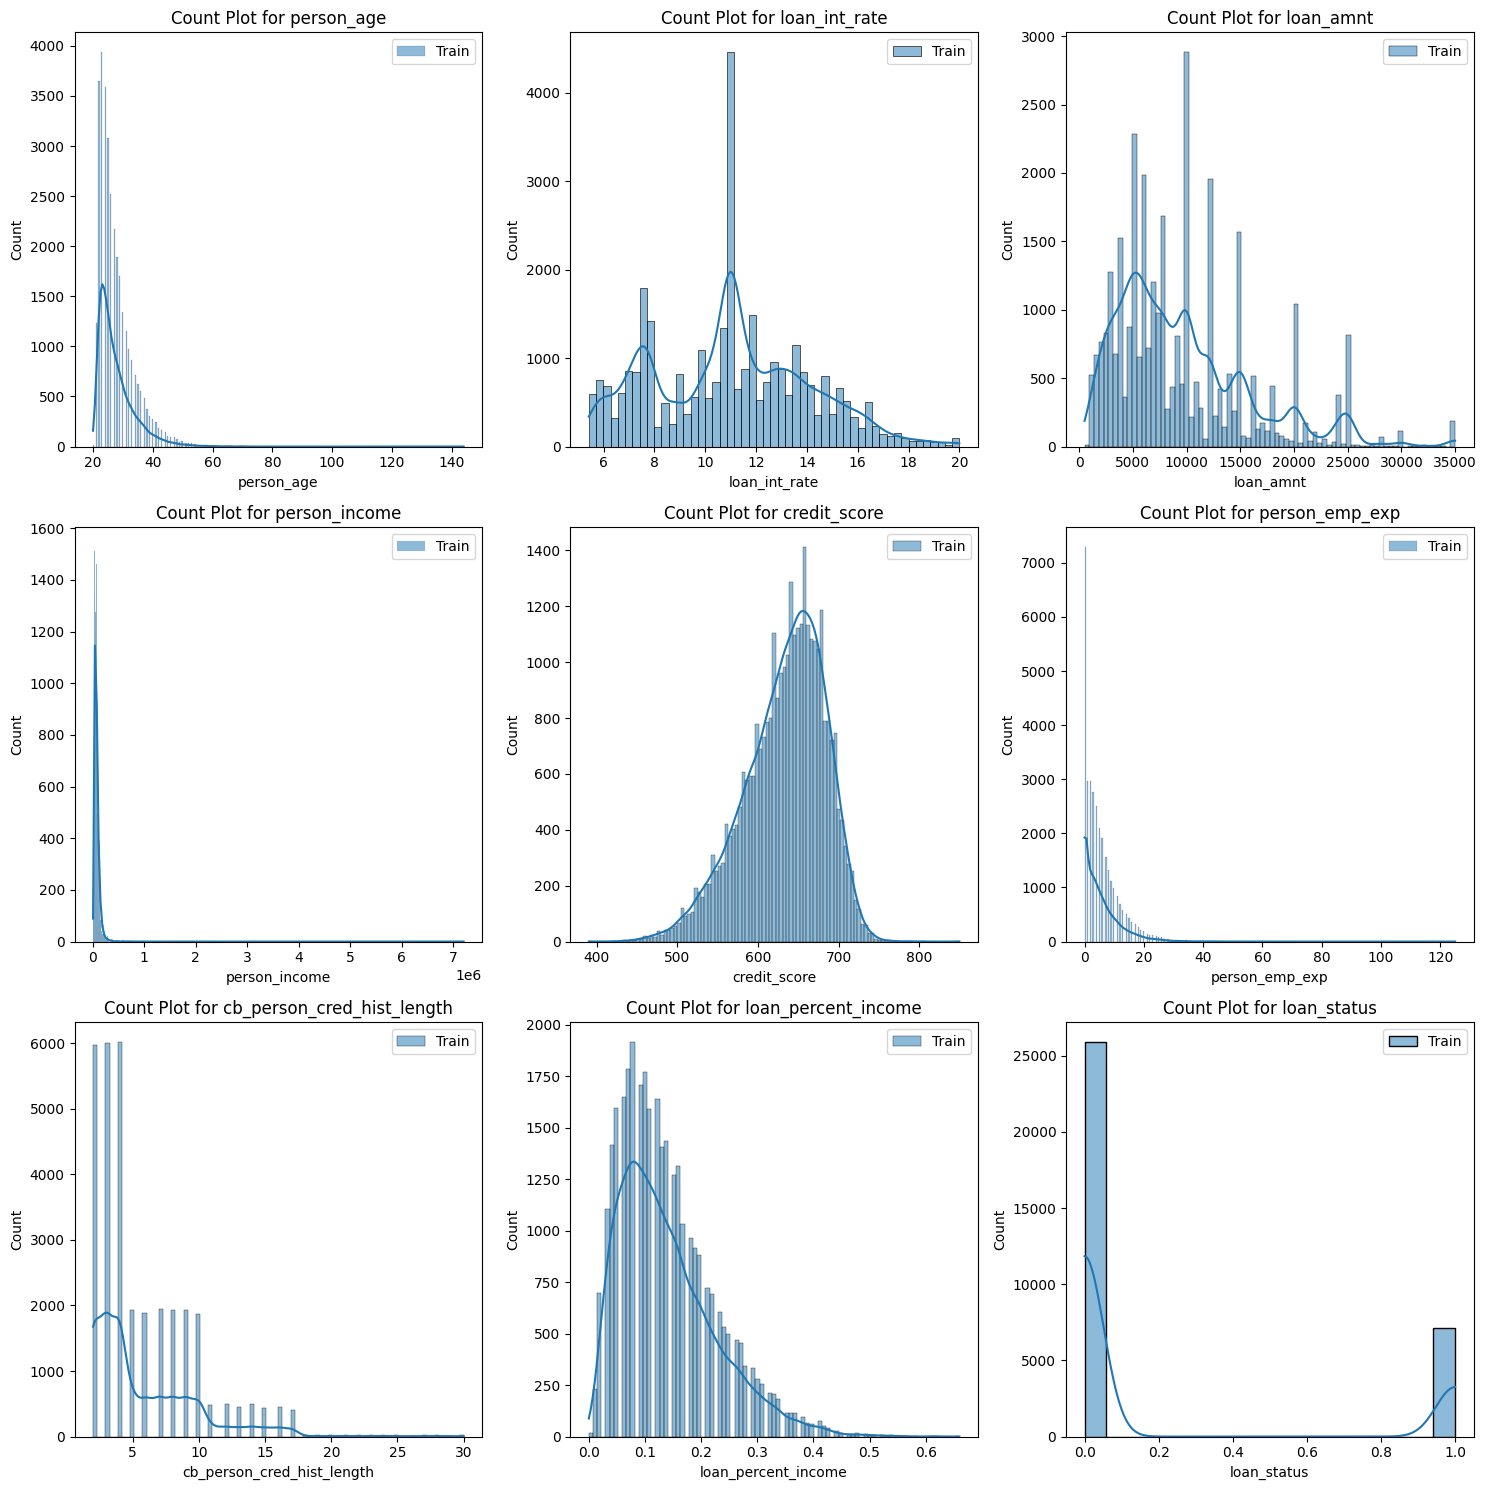

In [15]:
num_features = len(numerical_cols)
cols = 3
rows = (num_features + cols - 1) // cols
plt.figure(figsize=(5 * cols, 5* rows))

for i, column in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(train[column], label='Train', kde=True)
    # sns.histplot(test[column], label='Test', kde=True, color='orange')
    plt.title(f'Count Plot for {column}')
    plt.legend()

plt.tight_layout()
plt.show()

**Observation**:
1. person_age, person_income, person_emp_exp, loan_percent_income and cb_person_cred_hist_length has the right-skewed distribution.
2. credit_score and loan_int_rate have nearly normal distribution.

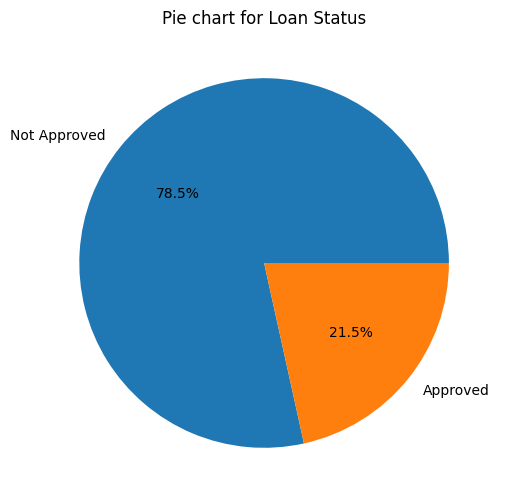

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(train['loan_status'].value_counts(), labels=['Not Approved','Approved'], autopct='%1.1f%%')
plt.title('Pie chart for Loan Status')
plt.show()

**Observation** : Since the data is not balanced, the Oversampling can be considered.

# 2. Preprocessing data


## Cleaning

Remove the outliers in age and emp_exp columns

In [17]:
def clean(train_):     
    train = train_.copy()
    
    train = train.drop(train[train['person_age'] > 130].index)
    train = train.drop(train[train['person_emp_exp'] > 110].index)
    train = train.reset_index(drop=True)

    return train

In [18]:
train_cleaned = clean(train)

In [19]:
train_cleaned.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,32996.000000,3.299600e+04,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.00000
mean,27.727997,8.015841e+04,5.505758,9587.623136,11.001304,0.139158,5.810977,632.987120,0.21542
std,6.236385,6.305423e+04,6.233347,6318.046338,3.069253,0.086779,4.049205,50.351551,0.41112
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.00000
25%,23.000000,4.748275e+04,1.000000,5000.000000,8.490000,0.070000,3.000000,602.000000,0.00000
50%,26.000000,6.718600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.00000
75%,30.000000,9.650375e+04,8.000000,12100.000000,13.110000,0.190000,8.000000,670.000000,0.00000
max,123.000000,2.448661e+06,101.000000,35000.000000,20.000000,0.660000,30.000000,805.000000,1.00000


**Note: No clean anything from test data**

## Drop the target from data

In [20]:
def drop_target(df):
    x = df.drop('loan_status',axis=1)
    y = df['loan_status']
    return x,y

In [21]:
X_train, Y_train = drop_target(train_cleaned)
X_test, Y_test = drop_target(test)

## Feature Engineering

Use feature engineering to create some new features with the aim of capturing pattern with high accurcacy.


In [22]:
def feature_engineering(df_):  
    df = df_.copy()  
    
    df['loan_to_income'] = ((df['loan_amnt'] / df['person_income']) - df['loan_percent_income'])
    df['loan_credit_ratio'] = df['loan_amnt'] / df['credit_score']
    monthly_income = df['person_income'] / 12
    df['monthly_debt'] = df['loan_amnt'] * (1 + df['loan_int_rate']) / 12
    df['dti_ratio'] = df['monthly_debt'] / monthly_income
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  

    return df

In [23]:
train_fe, test_fe = feature_engineering(X_train), feature_engineering(X_test)

In [24]:
train_fe.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_to_income,loan_credit_ratio,monthly_debt,dti_ratio,cred_hist_to_age_ratio,int_to_loan_ratio,debt_to_credit_ratio,int_to_cred_hist
count,32996.000000,3.299600e+04,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000,32996.000000
mean,27.727997,8.015841e+04,5.505758,9587.623136,11.001304,0.139158,5.810977,632.987120,0.000026,15.240573,9813.455022,1.702413,0.195021,0.001881,2390.248731,2.784610
std,6.236385,6.305423e+04,6.233347,6318.046338,3.069253,0.086779,4.049205,50.351551,0.002901,10.144022,7655.431763,1.220680,0.093441,0.001871,2210.749679,1.809475
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,-0.005000,0.698324,448.333333,0.007898,0.024390,0.000200,34.482759,0.180667
25%,23.000000,4.748275e+04,1.000000,5000.000000,8.490000,0.070000,3.000000,602.000000,-0.002506,7.740672,4468.062500,0.796274,0.125000,0.000800,863.352273,1.355000
50%,26.000000,6.718600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000036,12.908778,7580.208333,1.391235,0.173913,0.001284,1666.666667,2.380000
75%,30.000000,9.650375e+04,8.000000,12100.000000,13.110000,0.190000,8.000000,670.000000,0.002543,20.214427,12821.666667,2.310798,0.261128,0.002202,3142.857143,3.727500
max,123.000000,2.448661e+06,101.000000,35000.000000,20.000000,0.660000,30.000000,805.000000,0.005000,74.468085,61250.000000,9.881430,0.588235,0.022820,17500.000000,10.000000


In [25]:
test_fe.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_to_income,loan_credit_ratio,monthly_debt,dti_ratio,cred_hist_to_age_ratio,int_to_loan_ratio,debt_to_credit_ratio,int_to_cred_hist
count,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,27.834333,8.013774e+04,5.118333,9572.006417,11.020593,0.141313,6.021833,631.527583,0.000014,15.256888,9829.296268,1.733188,0.206096,0.001873,2027.344930,2.368011
std,5.168312,9.534709e+04,5.239429,6307.116278,2.715026,0.088370,3.361195,50.575125,0.002911,10.154152,7529.100631,1.220693,0.078924,0.001775,1736.150779,1.321809
min,20.000000,8.000000e+03,0.000000,563.000000,5.420000,0.000000,2.000000,418.000000,-0.005000,0.854325,565.345833,0.009065,0.076923,0.000219,55.666667,0.213929
25%,24.000000,4.671850e+04,1.000000,5000.000000,8.980000,0.070000,4.000000,600.000000,-0.002546,7.704160,4519.758750,0.814458,0.148148,0.000816,825.187500,1.359750
50%,26.000000,6.647350e+04,4.000000,8000.000000,11.010000,0.120000,5.000000,638.000000,-0.000006,12.797554,7620.000000,1.432024,0.185185,0.001300,1524.200000,2.100714
75%,30.000000,9.461525e+04,7.000000,12389.250000,12.790000,0.190000,8.000000,669.000000,0.002576,20.441260,12995.040000,2.356753,0.259259,0.002215,2666.666667,3.100000
max,116.000000,5.556399e+06,93.000000,35000.000000,20.000000,0.630000,30.000000,792.000000,0.005030,70.850202,57137.500000,8.426117,0.557692,0.019627,17500.000000,9.795000


## Feature Scaling

**Motivation**: Standardizing numerical features to ensure that each feature has a mean of 0 and a standard deviation of 1.

In [26]:
def feature_scaling(train_, test_):
    train, test = train_.copy(), test_.copy()
    numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    scaler = StandardScaler()
    train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
    test[numerical_cols] = scaler.transform(test[numerical_cols])
    return train, test

In [27]:
train_scaled, test_scaled = feature_scaling(train_fe, test_fe)

In [28]:
train_scaled.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,credit_score,previous_loan_defaults_on_file,loan_to_income,loan_credit_ratio,monthly_debt,dti_ratio,cred_hist_to_age_ratio,int_to_loan_ratio,debt_to_credit_ratio,int_to_cred_hist
0,-0.918494,female,Master,-0.130214,-0.883288,RENT,4.022250,PERSONAL,1.635177,4.043013,...,-1.429712,No,-1.228368,4.647933,5.202687,5.388206,-0.627754,-0.760694,4.196114,1.412249
1,-1.078846,female,High School,-1.076493,-0.883288,OWN,-1.359242,EDUCATION,0.045189,-0.681727,...,-2.561770,Yes,0.480531,-1.306843,-1.149762,-0.584908,-1.067884,4.948944,-0.855039,1.539359
2,-0.437439,female,High School,-1.074019,-0.401999,MORTGAGE,-0.646986,MEDICAL,0.608853,3.466826,...,0.039977,No,0.747099,-0.648584,-0.451500,3.629840,-0.802879,0.245380,-0.251916,0.831961
3,-0.758143,female,Bachelor,-0.006430,-0.883288,RENT,4.022250,MEDICAL,1.377781,3.466826,...,0.834404,No,-0.403646,3.609203,4.901698,4.440381,-1.156515,-0.772759,6.834777,2.669538
4,-0.597791,male,Master,-0.222406,-0.722858,RENT,4.022250,MEDICAL,1.064997,4.503964,...,-0.933195,No,-0.277631,4.385545,4.535939,5.225677,-0.303447,-0.787419,2.876783,0.432668


In [29]:
test_scaled.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,credit_score,previous_loan_defaults_on_file,loan_to_income,loan_credit_ratio,monthly_debt,dti_ratio,cred_hist_to_age_ratio,int_to_loan_ratio,debt_to_credit_ratio,int_to_cred_hist
0,0.043616,female,Master,-0.210337,0.239721,OWN,1.331504,PERSONAL,0.895572,1.507787,...,0.496772,Yes,-0.328010,1.194323,1.608235,1.856726,0.206178,-0.597045,0.275816,-0.272428
1,-0.277087,female,Associate,-0.731689,-0.241569,RENT,-1.165983,MEDICAL,0.478526,-0.796964,...,0.059838,Yes,-1.636184,-1.158181,-0.956248,-0.674306,-0.440653,1.995634,-0.830047,0.183973
2,-0.277087,female,Bachelor,1.144454,-0.562428,MORTGAGE,0.851918,PERSONAL,-0.899680,-0.451252,...,-0.615425,Yes,-0.601863,0.949001,0.223824,-0.650718,-0.440653,-0.711136,0.611680,-0.400459
3,-0.597791,female,Associate,-0.681018,-0.401999,RENT,-0.567846,EDUCATION,0.201582,0.240174,...,1.211756,No,0.408953,-0.650150,-0.457650,0.272054,-1.195291,0.029800,0.275816,1.671996
4,0.685023,male,Bachelor,0.075089,0.400151,MORTGAGE,0.260429,DEBTCONSOLIDATION,-0.567347,-0.105539,...,0.953568,Yes,0.790612,0.123650,-0.027333,-0.282482,-0.080486,-0.564725,-0.234350,-0.685998


## Yoe-Johnson Transformation

**Motivation** :  Since some of the numerical features have the right skewness distribution and contain zeros, negative values after feature scaling, using Yoe-Johsnson transformation can transform the data to the Gaussian distribution.

In [30]:
from sklearn.preprocessing import PowerTransformer

def feature_transformation(train_, test_):
    train, test = train_.copy(), test_.copy()
    numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    yoe_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    train[numerical_cols] = yoe_johnson_transformer.fit_transform(train[numerical_cols])
    test[numerical_cols] = yoe_johnson_transformer.transform(test[numerical_cols])
    return train, test

In [31]:
train_transformed, test_transformed = feature_transformation(train_scaled, test_scaled)

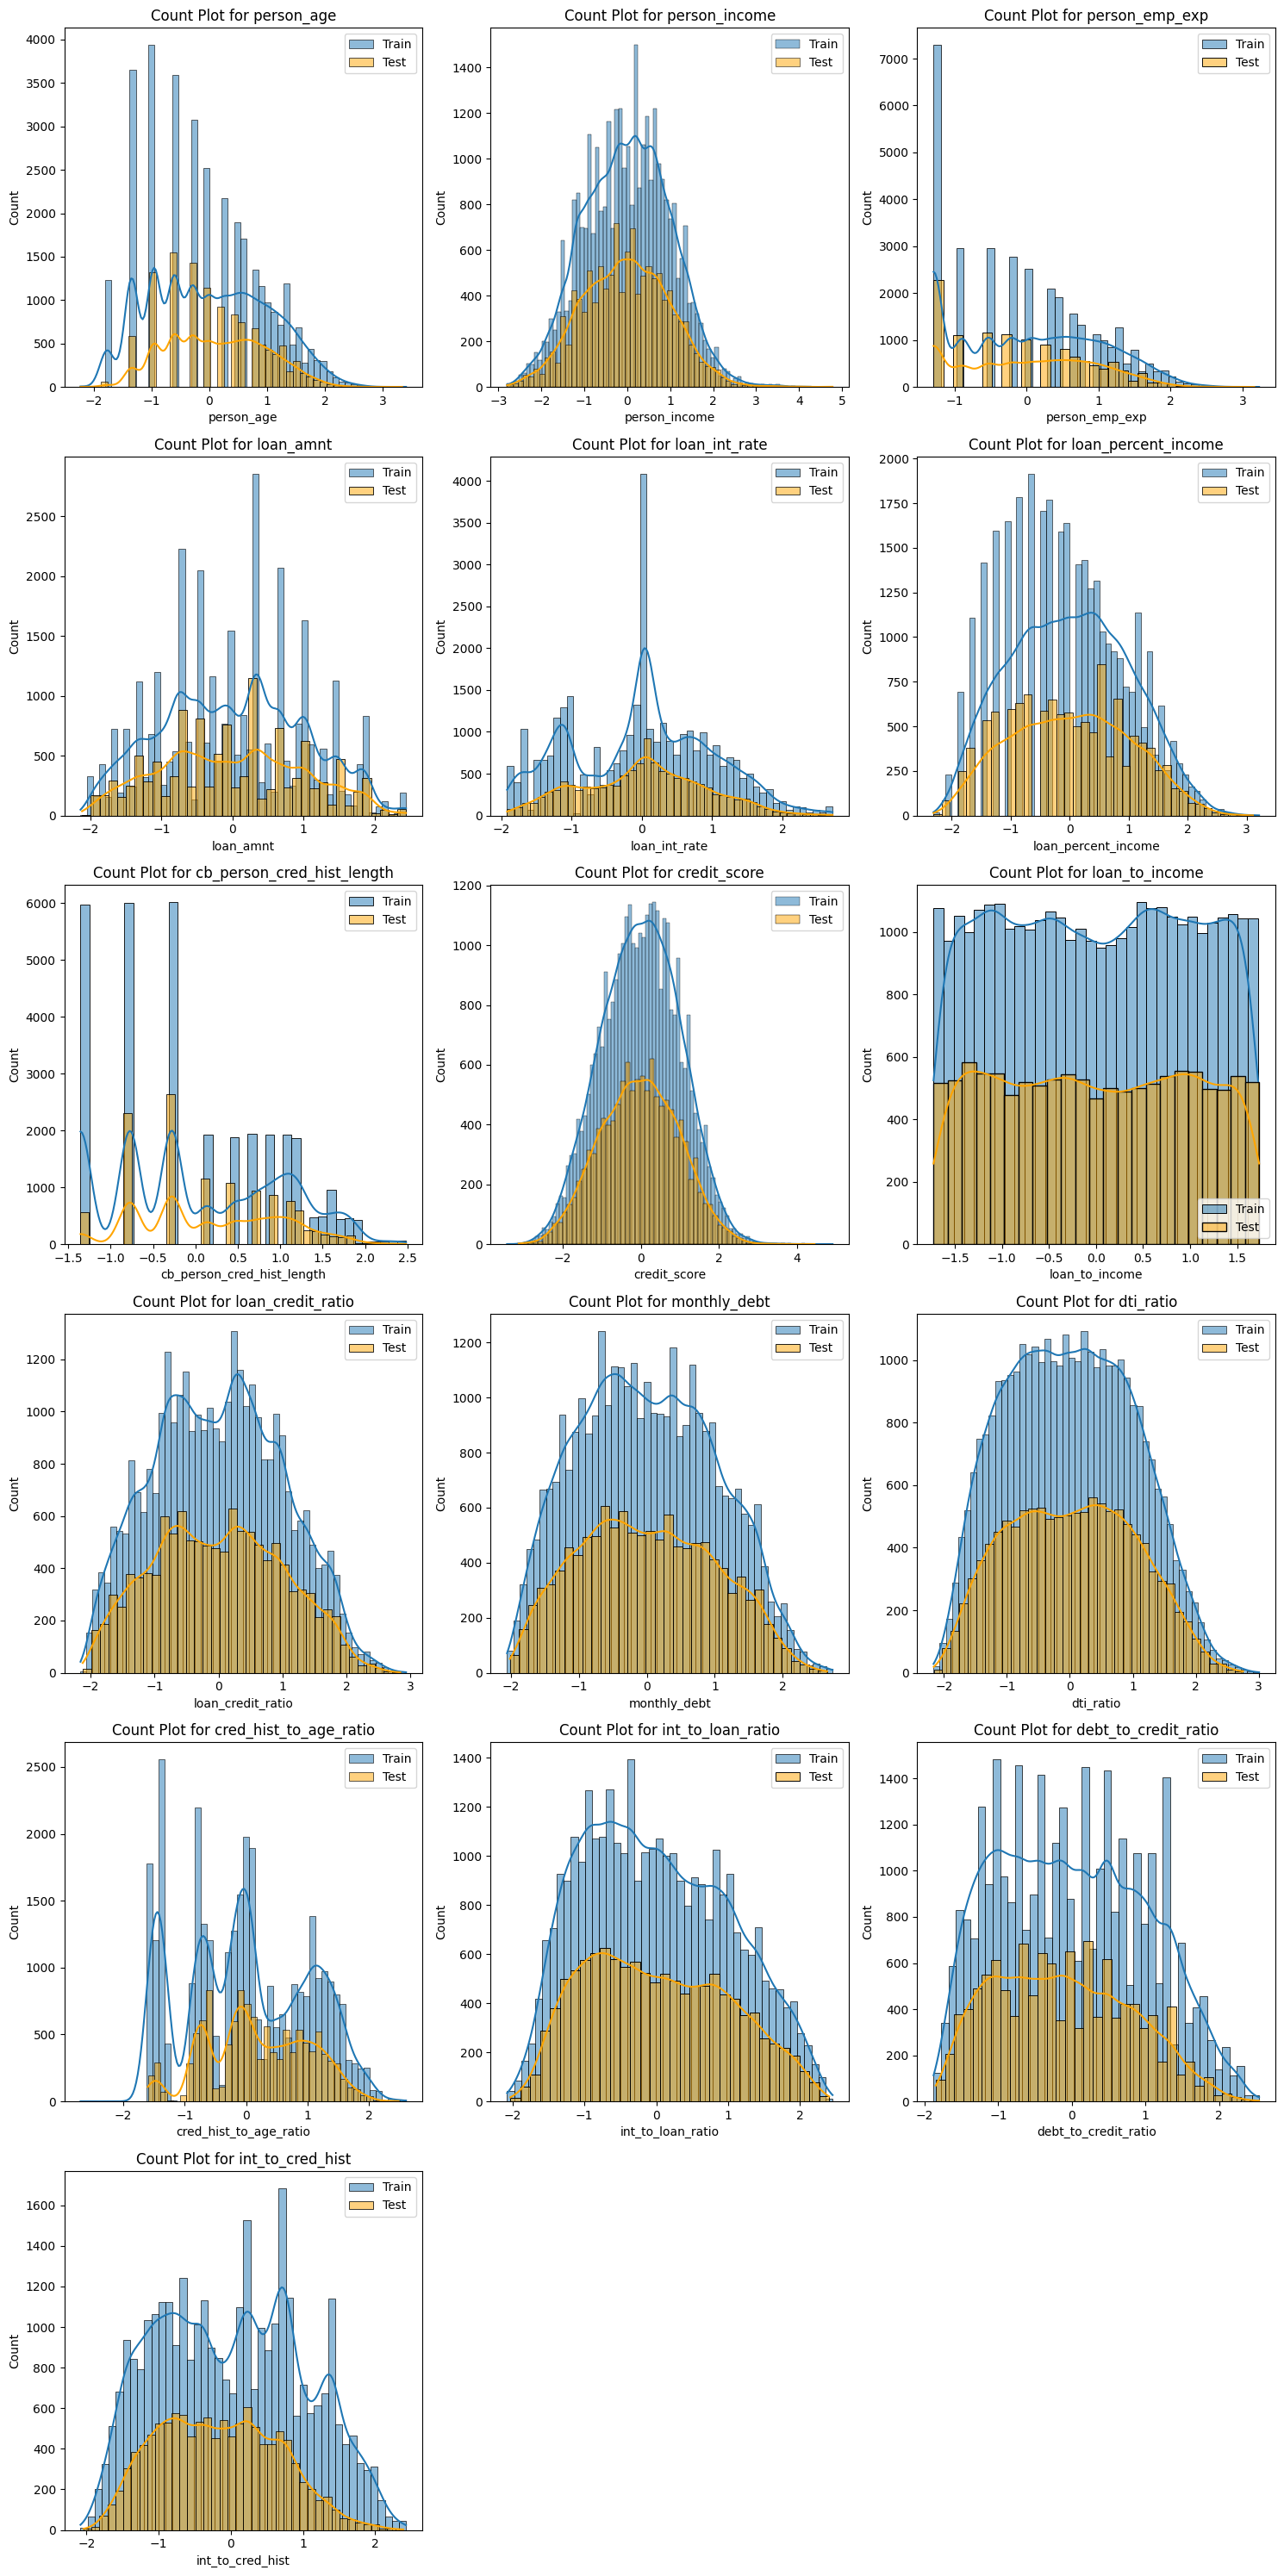

In [32]:
numerical_cols = train_transformed.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features = len(numerical_cols)
cols = 3
rows = (num_features + cols - 1) // cols
plt.figure(figsize=(5 * cols, 5* rows))

for i, column in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(train_transformed[column], label='Train', kde=True)
    sns.histplot(test_transformed[column], label='Test', kde=True, color='orange')
    plt.title(f'Count Plot for {column}')
    plt.legend()

plt.tight_layout()
plt.show()

## Encoding categorical features

In [33]:
categorical_cols = train_transformed.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


1. person_gender: Binary Encoding
2. person_education: One Hot Encoding
3. person_home_ownership: One Hot Encoding
4. loan_intent: One-Hot Encoding
5. previous_loan_defaults_on_file:	Binary Encoding

In [36]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def encode_train_test(df_train, df_test):
    encoders = {}
    
    # Binary Encoding
    binary_features = ['person_gender', 'previous_loan_defaults_on_file']
    for feature in binary_features:
        le = LabelEncoder()
        le.fit(df_train[feature])
        encoders[feature] = le
        
    # One-Hot Encoding
    one_hot_features = ['person_home_ownership', 'loan_intent', 'person_education']
    one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
    one_hot_encoder.fit(df_train[one_hot_features])
    encoders['one_hot'] = one_hot_encoder
    
    def transform_data(df, encoders):
        # Binary Encoding
        for feature in binary_features:
            le = encoders[feature]
            df[feature] = le.transform(df[feature])
        
        # One-Hot Encoding
        one_hot_encoded = encoders['one_hot'].transform(df[one_hot_features])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoders['one_hot'].get_feature_names_out(one_hot_features))
        one_hot_encoded_df = one_hot_encoded_df.astype('int64')
        df = df.drop(columns=one_hot_features).reset_index(drop=True)
        df = pd.concat([df, one_hot_encoded_df], axis=1)
        
        return df
    
    df_train_encoded = transform_data(df_train.copy(), encoders)
    df_test_encoded = transform_data(df_test.copy(), encoders)
    
    return df_train_encoded, df_test_encoded

In [37]:
train_encoded, test_encoded = encode_train_test(train_transformed, test_transformed)

In [38]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32996 entries, 0 to 32995
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32996 non-null  float64
 1   person_gender                   32996 non-null  int64  
 2   person_income                   32996 non-null  float64
 3   person_emp_exp                  32996 non-null  float64
 4   loan_amnt                       32996 non-null  float64
 5   loan_int_rate                   32996 non-null  float64
 6   loan_percent_income             32996 non-null  float64
 7   cb_person_cred_hist_length      32996 non-null  float64
 8   credit_score                    32996 non-null  float64
 9   previous_loan_defaults_on_file  32996 non-null  int64  
 10  loan_to_income                  32996 non-null  float64
 11  loan_credit_ratio               32996 non-null  float64
 12  monthly_debt                    

In [39]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      12000 non-null  float64
 1   person_gender                   12000 non-null  int64  
 2   person_income                   12000 non-null  float64
 3   person_emp_exp                  12000 non-null  float64
 4   loan_amnt                       12000 non-null  float64
 5   loan_int_rate                   12000 non-null  float64
 6   loan_percent_income             12000 non-null  float64
 7   cb_person_cred_hist_length      12000 non-null  float64
 8   credit_score                    12000 non-null  float64
 9   previous_loan_defaults_on_file  12000 non-null  int64  
 10  loan_to_income                  12000 non-null  float64
 11  loan_credit_ratio               12000 non-null  float64
 12  monthly_debt                    

## Oversampling

In [40]:
X = train_encoded
y = Y_train
x_test = test_encoded
y_test = Y_test

In [41]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from imblearn.over_sampling import SMOTE

print("Before oversampling:", Counter(y_train))

smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("After oversampling:", Counter(y_train))

Before oversampling: Counter({0: 20748, 1: 5648})
After oversampling: Counter({0: 20748, 1: 10374})


In [43]:
x_train = x_train.values
y_train = y_train.values
x_val = x_val.values
y_val = y_val.values
x_test = x_test.values
y_test = y_test.values

In [44]:
# Function to evaluate model on test set
def evaluate_model(model, x_test, y_test):
    # Predict on test set
    y_pred_prob = model.predict(x_test)
    
    # Check if predictions are probabilities
    if y_pred_prob.ndim > 1 and y_pred_prob.shape[1] > 1:
        y_pred = (y_pred_prob[:, 1] >= 0.5).astype(int)
    else:
        y_pred = (y_pred_prob >= 0.5).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # Print metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# 3.  Solutions

# Approach 1: Basic Machine Learning Models

## Logistic Regression

In [45]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
        
    def predict(self, X):
        X = np.asarray(X, dtype = np.float32)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [46]:
logistic_regression = LogisticRegression(learning_rate=0.1, n_iterations = 10000)
logistic_regression.fit(x_train, y_train)

In [47]:
# Validation
y_val_pred = logistic_regression.predict(x_val)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_f1 = f1_score(y_val, y_val_pred, average='binary')

print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

Precision: 0.7098
Recall: 0.8226
F1-Score: 0.7621

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      5140
           1       0.71      0.82      0.76      1460

    accuracy                           0.89      6600
   macro avg       0.83      0.86      0.84      6600
weighted avg       0.89      0.89      0.89      6600



Precision: 0.7436
Recall: 0.8534
F1-Score: 0.7947

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9108
           1       0.74      0.85      0.79      2892

    accuracy                           0.89     12000
   macro avg       0.85      0.88      0.86     12000
weighted avg       0.90      0.89      0.90     12000



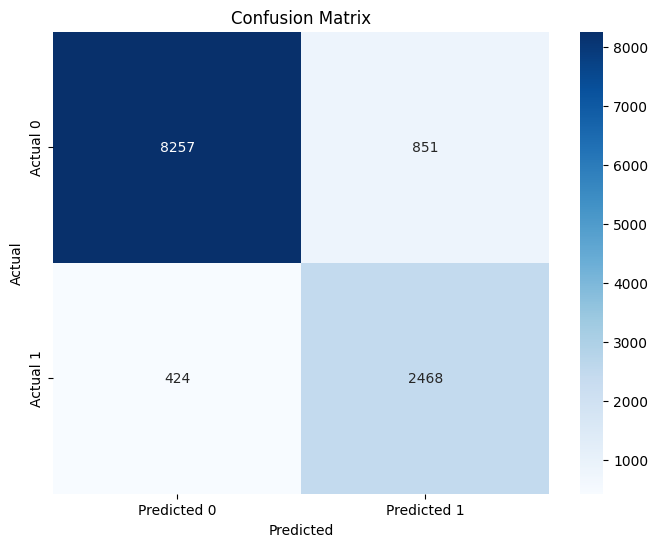

In [48]:
# Predict on test set:
evaluate_model(logistic_regression, x_test, y_test)

## KNN

In [49]:
import concurrent.futures

In [50]:
class KNN:
    def __init__(self, k=3):
        self.k = k  
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        with concurrent.futures.ThreadPoolExecutor() as executor:
            predictions = list(executor.map(self._predict, X_test))
        return np.array(predictions)

    def predict_proba(self, X_test):
        with concurrent.futures.ThreadPoolExecutor() as executor:
            probabilities = list(executor.map(self._predict_proba, X_test))
        return np.array(probabilities)

    def _predict(self, x):
        k_nearest_labels = self._get_k_nearest_labels(x)
        return np.bincount(k_nearest_labels).argmax()

    def _predict_proba(self, x):
        k_nearest_labels = self._get_k_nearest_labels(x)
        class_counts = np.bincount(k_nearest_labels, minlength=len(np.unique(self.y_train)))
        return class_counts / self.k

    def _get_k_nearest_labels(self, x):
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        k_indices = np.argsort(distances)[:self.k]
        return self.y_train[k_indices].astype(int)

In [51]:
knn_model = KNN(15)
knn_model.fit(x_train, y_train)

In [52]:
y_val_pred = knn_model.predict(x_val)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_f1 = f1_score(y_val, y_val_pred, average='binary')

print(f"Precision (Validation): {val_precision:.4f}")
print(f"Recall (Validation): {val_recall:.4f}")
print(f"F1-Score (Validation): {val_f1:.4f}")
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

Precision (Validation): 0.6944
Recall (Validation): 0.8110
F1-Score (Validation): 0.7482

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5140
           1       0.69      0.81      0.75      1460

    accuracy                           0.88      6600
   macro avg       0.82      0.85      0.83      6600
weighted avg       0.89      0.88      0.88      6600



Precision: 0.7566
Recall: 0.8171
F1-Score: 0.7857

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9108
           1       0.76      0.82      0.79      2892

    accuracy                           0.89     12000
   macro avg       0.85      0.87      0.86     12000
weighted avg       0.90      0.89      0.89     12000



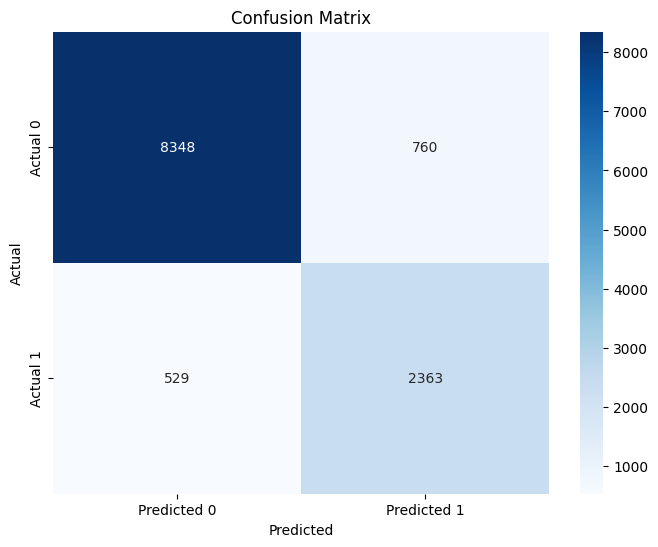

In [53]:
evaluate_model(knn_model, x_test, y_test)

# Approach 2: Model Ensemble

## Bagging: Random Forest

In [54]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth >= self.max_depth or n_labels==1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the IG
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        y = y.astype(int)
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [55]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
        
    def predict_proba(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        proba = np.array([self._class_probabilities(tree_pred) for tree_pred in tree_preds])
        return proba

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

    def _class_probabilities(self, y):
        counter = Counter(y)
        total = len(y)
        return {cls: count / total for cls, count in counter.items()}

In [ ]:
random_forest = RandomForest(n_trees=20)
random_forest.fit(x_train, y_train)

Tranning RF 20 trees takes about 1h30'

In [ ]:
# Save trained model
with open('models/random_forest_20.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

In [ ]:
# Get the trained Random Forest model
with open('models/random_forest_20.pkl', 'rb') as f:
    random_forest = pickle.load(f)

In [57]:
# Validation
rf_val_predictions = random_forest.predict(x_val)
rf_precision = precision_score(y_val, rf_val_predictions, average='binary')
rf_recall = recall_score(y_val, rf_val_predictions, average='binary')
rf_f1 = f1_score(y_val, rf_val_predictions, average='binary')

print("Random Forest prediction on validation set")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("\nClassification Report (Validation):")
print(classification_report(y_val, rf_val_predictions))

Random Forest prediction on validation set
Precision: 0.8159
Recall: 0.8103
F1-Score: 0.8131

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5140
           1       0.82      0.81      0.81      1460

    accuracy                           0.92      6600
   macro avg       0.88      0.88      0.88      6600
weighted avg       0.92      0.92      0.92      6600



Precision: 0.8475
Recall: 0.8205
F1-Score: 0.8338

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9108
           1       0.85      0.82      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



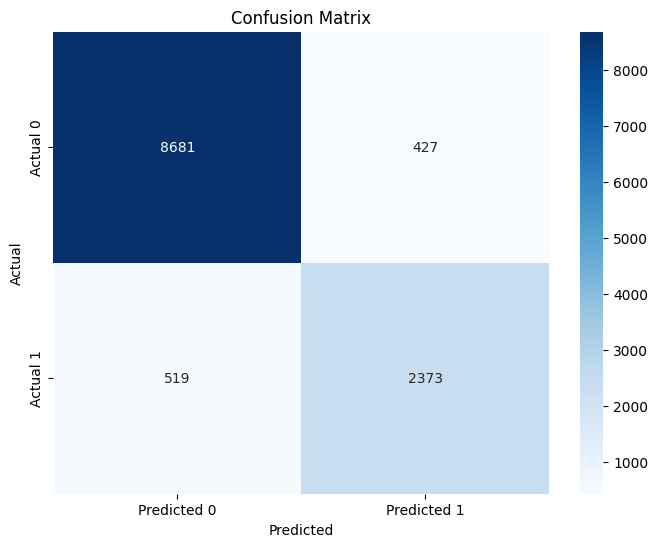

In [58]:
# Evaluate on test set
evaluate_model(random_forest, x_test, y_test)

## Boosting: XG Boost


In [59]:
class LogisticLoss:
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y, y_pred):
        y_pred = self.sigmoid(y_pred)
        return -np.mean(y * np.log(y_pred + 1e-7) + (1 - y) * np.log(1 - y_pred + 1e-7))
        
    # Gradient for logistic loss
    def gradient(self, y, y_pred):
        y_pred = self.sigmoid(y_pred)
        return y_pred - y
        
    # Hessian for logistic loss
    def hessian(self, y, y_pred):
        y_pred = self.sigmoid(y_pred)
        return y_pred * (1 - y_pred)  


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, max_depth=3, min_samples_split=2, reg_lambda=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.reg_lambda = reg_lambda
        self.root = None

    def fit(self, X, grad, hess):
        self.root = self._grow_tree(X, grad, hess)

    def _grow_tree(self, X, grad, hess, depth=0):
        n_samples, n_features = X.shape

        # Stop splitting if conditions are met
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            value = -np.sum(grad) / (np.sum(hess) + self.reg_lambda)  # Leaf value
            return Node(value=value)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, grad, hess, n_features)

        if best_feature is None:
            value = -np.sum(grad) / (np.sum(hess) + self.reg_lambda)
            return Node(value=value)

        # Split data
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], grad[left_idxs], hess[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], grad[right_idxs], hess[right_idxs], depth + 1)
        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)

    def _best_split(self, X, grad, hess, n_features):
        best_gain = -float('inf')
        split_idx, split_threshold = None, None

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                left_idxs, right_idxs = self._split(X_column, threshold)
                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue

                gain = self._gain(grad, hess, left_idxs, right_idxs)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        return split_idx, split_threshold

    def _gain(self, grad, hess, left_idxs, right_idxs):
        grad_left, grad_right = grad[left_idxs], grad[right_idxs]
        hess_left, hess_right = hess[left_idxs], hess[right_idxs]

        gain = 0.5 * (
            (np.sum(grad_left) ** 2) / (np.sum(hess_left) + self.reg_lambda) +
            (np.sum(grad_right) ** 2) / (np.sum(hess_right) + self.reg_lambda) -
            (np.sum(grad) ** 2) / (np.sum(hess) + self.reg_lambda)
        )
        return gain

    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [60]:
class BoostingModel:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, reg_lambda=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.reg_lambda = reg_lambda
        self.trees = []
        self.loss = LogisticLoss()

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for _ in range(self.n_estimators):
            grad = self.loss.gradient(y, y_pred)
            hess = self.loss.hessian(y, y_pred)

            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                reg_lambda=self.reg_lambda
            )
            tree.fit(X, grad, hess)

            update = tree.predict(X)
            y_pred += self.learning_rate * update
            self.trees.append(tree)

    def predict_proba(self, X):
        y_pred = np.zeros(X.shape[0], dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return LogisticLoss().sigmoid(y_pred)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

In [ ]:
bm = BoostingModel(n_estimators=30, learning_rate=0.1, max_depth=3,min_samples_split=2,reg_lambda=1)

bm.fit(x_train, y_train)

Trainning Gradient Boosting takes about 2h30'

In [ ]:
# Save model
with open('models/bm_30.pkl', 'wb') as f:
    pickle.dump(bm, f)

In [ ]:
# Get the trained XGBoost model
with open('models/bm_30.pkl', 'rb') as f:
    bm = pickle.load(f)

In [63]:
bm_val_predictions = bm.predict(x_val)
bm_precision = precision_score(y_val, bm_val_predictions, average='binary')
bm_recall = recall_score(y_val, bm_val_predictions, average='binary')
bm_f1 = f1_score(y_val, bm_val_predictions, average='binary')

print("Boosting Model prediction on validation set")
print(f"Precision: {bm_precision:.4f}")
print(f"Recall: {bm_recall:.4f}")
print(f"F1-Score: {bm_f1:.4f}")
print("\nClassification Report(Validation):")
print(classification_report(y_val, bm_val_predictions))

Boosting Model prediction on validation set
Precision: 0.7648
Recall: 0.8219
F1-Score: 0.7923

Classification Report(Validation):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5140
           1       0.76      0.82      0.79      1460

    accuracy                           0.90      6600
   macro avg       0.86      0.88      0.87      6600
weighted avg       0.91      0.90      0.91      6600



Precision: 0.7998
Recall: 0.8039
F1-Score: 0.8019

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9108
           1       0.80      0.80      0.80      2892

    accuracy                           0.90     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.90      0.90      0.90     12000



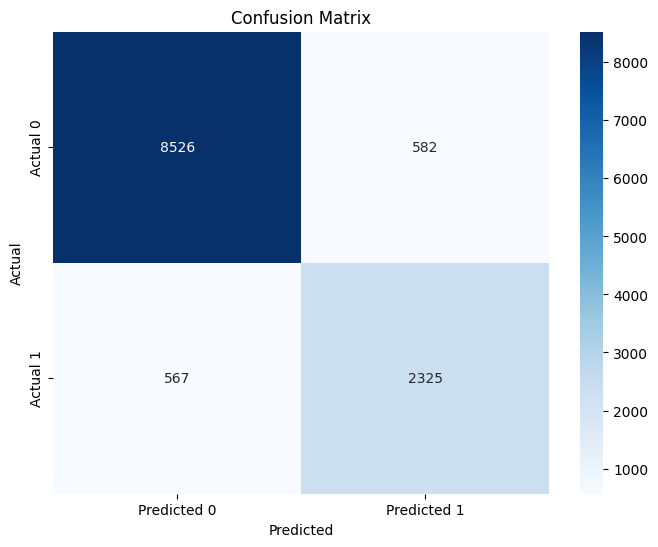

In [64]:
# Predict on test set
evaluate_model(bm, x_test, y_test)

# Approach 3: Deep Learning Approach

In [65]:
from keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout, GlobalAveragePooling2D, BatchNormalization, ReLU
from keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint,EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model

In [66]:
def _build_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=[AUC(name='roc_auc')] )

    return model

In [67]:
dl_model = _build_model()

dl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
early_stopping = EarlyStopping(
    monitor='val_roc_auc', 
    patience=5, 
    restore_best_weights=True, 
    mode='max', 
    min_delta=0.0001
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_roc_auc', 
    factor=0.2,
    patience=5, 
    min_lr=0.001
)

checkpoint = ModelCheckpoint(
    filepath='best_dl.keras', 
    monitor='val_roc_auc', 
    mode='max',
    save_best_only=True, 
    verbose=1)

history = dl_model.fit(
    x_train, y_train,
    epochs=30, 
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/30
969/973 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3478 - roc_auc: 0.7561
Epoch 1: val_roc_auc improved from -inf to 0.91213, saving model to best_dl.keras
973/973 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3468 - roc_auc: 0.7565 - val_loss: 0.8366 - val_roc_auc: 0.9121 - learning_rate: 1.0000e-04
Epoch 2/30
947/973 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7849 - roc_auc: 0.9292
Epoch 2: val_roc_auc improved from 0.91213 to 0.94847, saving model to best_dl.keras
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7828 - roc_auc: 0.9295 - val_loss: 0.5603 - val_roc_auc: 0.9485 - learning_rate: 1.0000e-04
Epoch 3/30
971/973 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5463 - roc_auc: 0.9543
Epoch 3: val_roc_auc improved from 0.94847 to 0.95549, saving model to best_dl.keras
973/973 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5463 - roc_auc: 0.9543 - val_loss: 0.4415 - val_roc_auc: 0.9555 - learning_rate: 1.0000e-04
Epoch 4/30
957/973 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.44

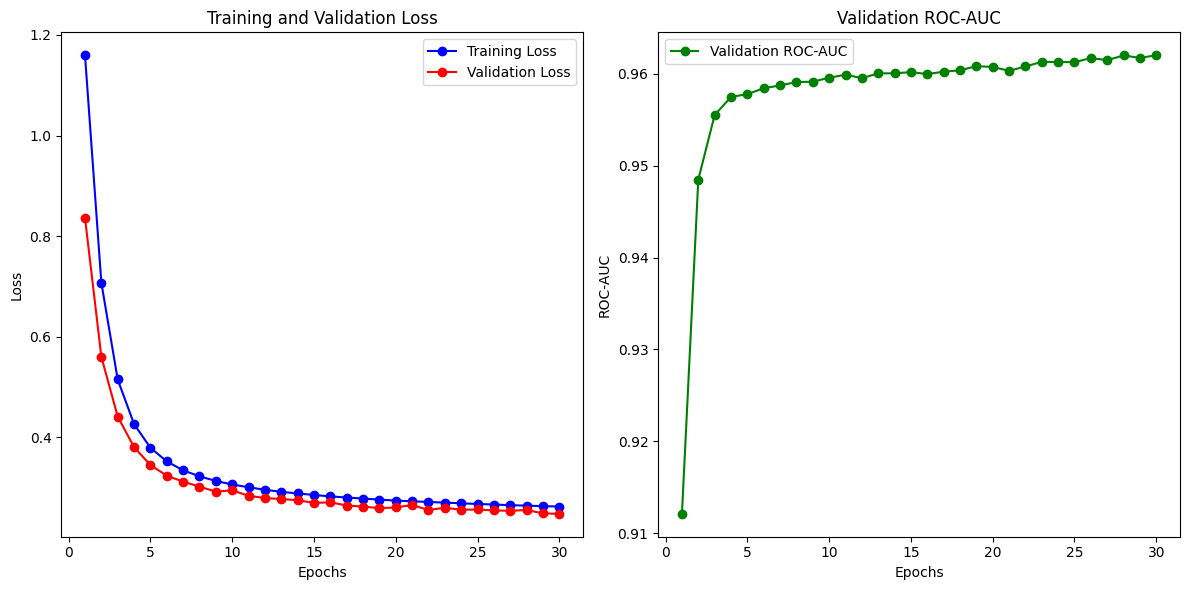

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']
val_roc_auc = history.history.get('val_roc_auc', None) 

epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation ROC-AUC
if val_roc_auc:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_roc_auc, 'go-', label='Validation ROC-AUC')
    plt.title('Validation ROC-AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC-AUC')
    plt.legend()

plt.tight_layout()
plt.show()

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
Precision: 0.7786
Recall: 0.8572
F1-Score: 0.8160

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      9108
           1       0.78      0.86      0.82      2892

    accuracy                           0.91     12000
   macro avg       0.87      0.89      0.88     12000
weighted avg       0.91      0.91      0.91     12000



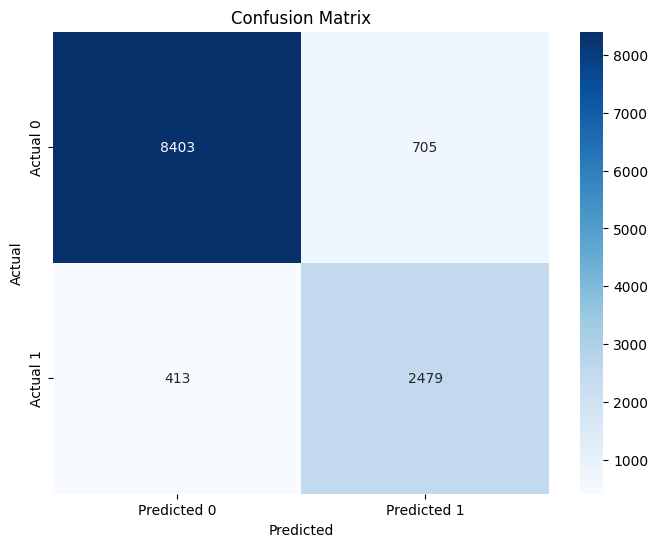

In [68]:
dl_model = load_model("best_dl.keras")

# Predict on test set:
evaluate_model(dl_model, x_test, y_test)

## Bagging with n Neural Networks

In [69]:
class BaggingNeuralNetwork:
    def __init__(self, n_estimators, learning_rate):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate 
        self.models = []
    
    def _build_model(self):
        model = Sequential([
            Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
            Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='binary_crossentropy', metrics=[AUC(name='roc_auc')] )
    
        return model

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X_train, y_train, epochs=10, batch_size=32):
        for i in range(self.n_estimators):
            # Bootstrap sampling
            X_sample, y_sample = self._bootstrap_samples(X_train, y_train)
            
            # Train n models
            model = self._build_model()
            model.fit(X_sample, y_sample, epochs=epochs, batch_size=batch_size, verbose=0)
            self.models.append(model)
            print(f"Model {i+1} done")

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict_proba(self, X):
        probabilities = []

        for model in self.models:
            proba = model.predict(X, verbose=0).flatten()
            probabilities.append(proba)

        probabilities = np.array(probabilities)
        avg_probabilities = np.mean(probabilities, axis=0) 

        return avg_probabilities

    def predict(self, X):
        predictions = []

        for model in self.models:
            pred = (model.predict(X, verbose=0).flatten() >= 0.5).astype(int)
            predictions.append(pred)
        
        predictions = np.swapaxes(predictions, 0, 1)
        
         # Majority voting
        final_predictions = np.array([self._most_common_label(pred) for pred in predictions]) 
        return final_predictions

In [28]:
bagging_nn = BaggingNeuralNetwork(n_estimators=30, learning_rate=1e-3)
bagging_nn.fit(x_train, y_train, epochs=20, batch_size=32)

Model 1 done
Model 2 done
Model 3 done
Model 4 done
Model 5 done
Model 6 done
Model 7 done
Model 8 done
Model 9 done
Model 10 done
Model 11 done
Model 12 done
Model 13 done
Model 14 done
Model 15 done
Model 16 done
Model 17 done
Model 18 done
Model 19 done
Model 20 done
Model 21 done
Model 22 done
Model 23 done
Model 24 done
Model 25 done
Model 26 done
Model 27 done
Model 28 done
Model 29 done
Model 30 done


Precision: 0.8112
Recall: 0.8468
F1-Score: 0.8286

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9108
           1       0.81      0.85      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.88      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



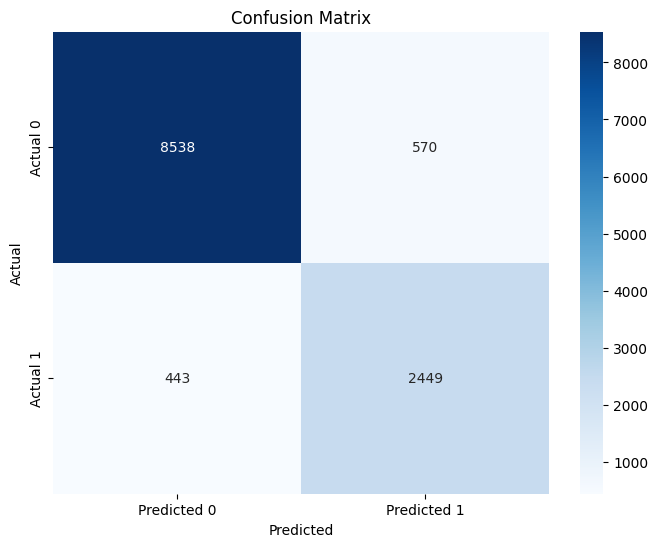

In [29]:
evaluate_model(bagging_nn, x_test, y_test)

In [ ]:
# Save model
with open('models/bnn_30.pkl', 'wb') as f:
    pickle.dump(bagging_nn, f)

# Approach 4: Stacking

In [72]:
def normalize_predictions(model, X, model_name):
    if model_name == "Bagging NN Model":
        predictions = model.predict_proba(X)
    elif model_name == "XGBoost":
        predictions = model.predict_proba(X)
    elif model_name == "Random Forest":
        raw_predictions = model.predict_proba(X)
        predictions = np.array([p[1] if 1 in p else 0 for p in raw_predictions])
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    
    return np.array(predictions, dtype=np.float64)

In [73]:
class StackingModel:
    def __init__(self, base_models, meta_model):
        
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_meta, y_meta):
        # Collect the predictions from each trained base model on validation test
        base_model_val_predictions = []
        
        for name, model in self.base_models:
            val_predictions = normalize_predictions(model, X_meta, name)
            base_model_val_predictions.append(val_predictions)

        # Stack the predictions to create a new data set for the meta model
        stacked_predictions = np.column_stack(base_model_val_predictions)

        # Train the meta model on the stacked predictions
        self.meta_model.fit(stacked_predictions, y_meta)

    def predict_proba(self, X):
        # Collect probabilities from each base model
        base_model_predictions = []
        for name, model in self.base_models:
            predictions = normalize_predictions(model, X, name)
            base_model_predictions.append(predictions)
        
        # Stack probabilities horizontally
        stacked_test_predictions = np.column_stack(base_model_predictions)
        
        return self.meta_model.predict_proba(stacked_test_predictions)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

In [ ]:
# Load trained base models, these 3 models have been trained on (x_train, y_train)

# Random Forest
with open('models/random_forest_20.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Boosting Model
with open('models/bm_30.pkl', 'rb') as f:
    boosting_model = pickle.load(f)

# Bagging Neural Network Model
with open('models/bnn_30.pkl', 'rb') as f:
    bnn_model = pickle.load(f)

base_models = [
    ("Random Forest", rf_model),
    ("Bagging NN Model", bnn_model), 
    ("XGBoost", boosting_model)
]

# Define the meta model Logistic Regression
meta_model = LogisticRegression(learning_rate=0.1, n_iterations = 10000)

# Create an instance of the StackingModel class
stacking_model = StackingModel(base_models=base_models, meta_model=meta_model)

stacking_model.fit(x_val, y_val)

Precision: 0.8669
Recall: 0.8015
F1-Score: 0.8329

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9108
           1       0.87      0.80      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.90      0.88      0.89     12000
weighted avg       0.92      0.92      0.92     12000



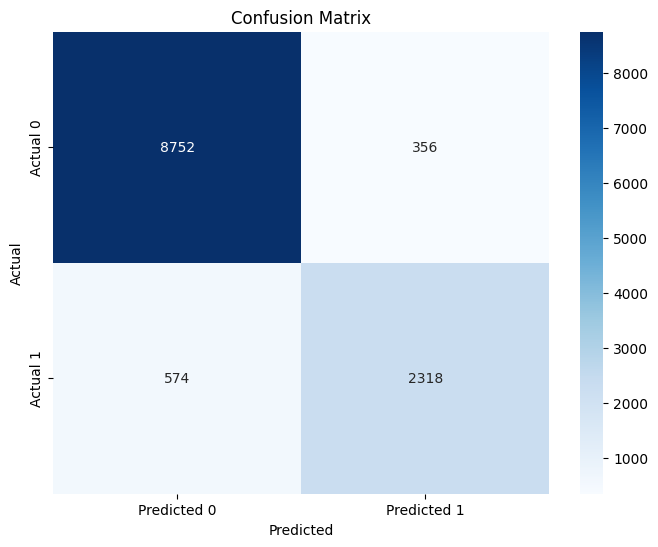

In [75]:
# Predict on test set
evaluate_model(stacking_model, x_test, y_test)

# Approach 5: Voting

In [76]:
class VotingModel:
    def __init__(self, base_models, voting='hard'):
        self.base_models = base_models
        self.voting = voting

    def predict(self, X):
        if self.voting == 'hard':
            return self._hard_voting(X)
        elif self.voting == 'soft':
            return self._soft_voting(X)
        else:
            raise ValueError(f"Unknown voting type: {self.voting}")

    def _hard_voting(self, X):
        probabilities = np.array([self._normalize_and_predict(model, X, name) for name, model in self.base_models])
        predictions = (probabilities >= 0.5).astype(int)
        predictions = np.swapaxes(predictions, 0, 1)
        majority_vote = [np.bincount(row.astype(int)).argmax() for row in predictions]
        return np.array(majority_vote)

    def _soft_voting(self, X):
        probabilities = np.array([self._normalize_and_predict(model, X, name) for name, model in self.base_models])
        avg_probabilities = np.mean(probabilities, axis=0)
        return (avg_probabilities >= 0.5).astype(int)

    def _normalize_and_predict(self, model, X, model_name):
        return normalize_predictions(model, X, model_name)

In [ ]:
# Random Forest
with open('models/random_forest_20.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Boosting Model
with open('models/bm_30.pkl', 'rb') as f:
    boosting_model = pickle.load(f)

# Bagging Neural Network Model
with open('models/bnn_30.pkl', 'rb') as f:
    bnn_model = pickle.load(f)

base_models = [
    ("Random Forest", rf_model),
    ("Bagging NN Model", bnn_model), 
    ("XGBoost", boosting_model)
]

soft_voting_model = VotingModel(base_models=base_models, voting='soft')
hard_voting_model = VotingModel(base_models=base_models, voting='hard')


Soft Voting:
Precision: 0.8325
Recall: 0.8299
F1-Score: 0.8312

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9108
           1       0.83      0.83      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



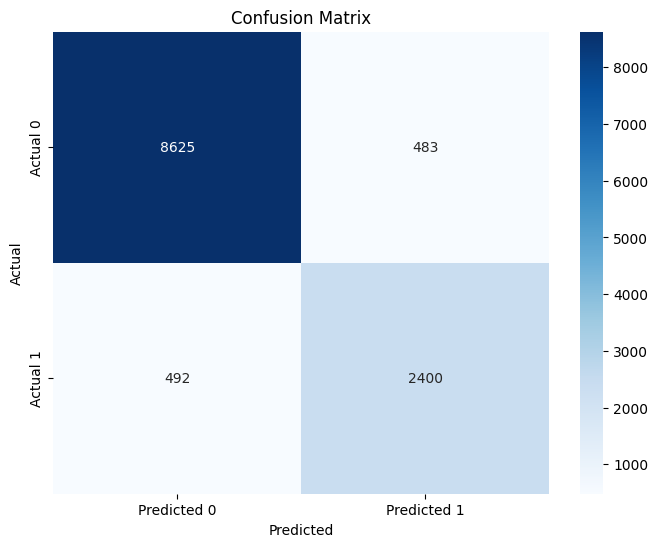

In [78]:
print("\nSoft Voting:")
evaluate_model(soft_voting_model, x_test, y_test)


Hard Voting:
Precision: 0.8255
Recall: 0.8309
F1-Score: 0.8282

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9108
           1       0.83      0.83      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



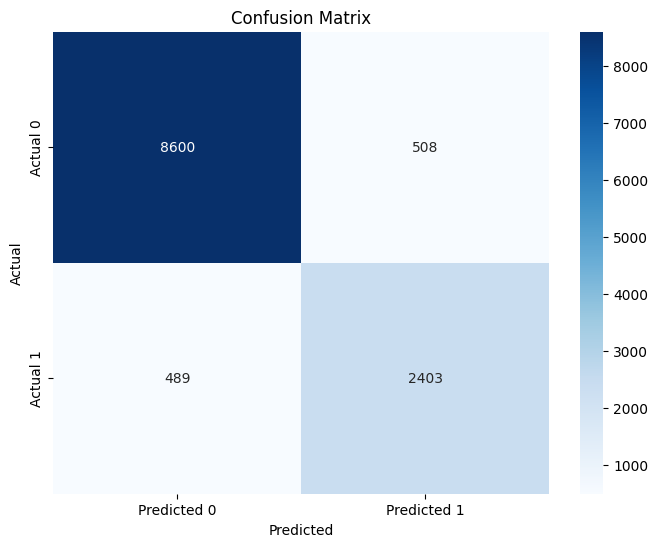

In [79]:
print("\nHard Voting:")
evaluate_model(hard_voting_model, x_test, y_test)

# 4. Submissions

This part is for evaluating our results

In [80]:
# Load and preprocess train and test

train_path = "data/train.csv"

# Change the path with new test
new_test_path = "data/test.csv"

# Read train and test
train, test = read_train_test(train_path, new_test_path)

# Remove outiliers in train
train_cleaned = clean(train)

# Drop the target
X_train, Y_train = drop_target(train_cleaned)
X_test, Y_test = drop_target(test)

# Feature engineering
train_fe, test_fe = feature_engineering(X_train), feature_engineering(X_test)

# Feature Scaling
train_scaled, test_scaled = feature_scaling(train_fe, test_fe)

# Feature Transformation
train_transformed, test_transformed = feature_transformation(train_scaled, test_scaled)

# Feature Encoding
train_encoded, test_encoded = encode_train_test(train_transformed, test_transformed)

X = train_encoded
y = Y_train
x_test = test_encoded
y_test = Y_test

# Split data into train and valid
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


# Convert to array
x_train = x_train.values
y_train = y_train.values
x_val = x_val.values
y_val = y_val.values
x_test = x_test.values
y_test = y_test.values

Precision: 0.7436
Recall: 0.8534
F1-Score: 0.7947

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9108
           1       0.74      0.85      0.79      2892

    accuracy                           0.89     12000
   macro avg       0.85      0.88      0.86     12000
weighted avg       0.90      0.89      0.90     12000



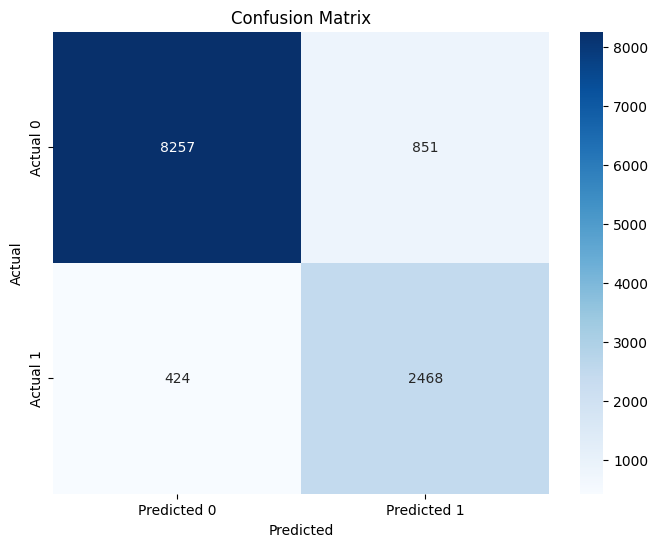

In [41]:
# Logistic Regression
logistic_regression = LogisticRegression(learning_rate=0.1, n_iterations = 10000)
logistic_regression.fit(x_train, y_train)
evaluate_model(logistic_regression, x_test, y_test)

Precision: 0.7566
Recall: 0.8171
F1-Score: 0.7857

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9108
           1       0.76      0.82      0.79      2892

    accuracy                           0.89     12000
   macro avg       0.85      0.87      0.86     12000
weighted avg       0.90      0.89      0.89     12000



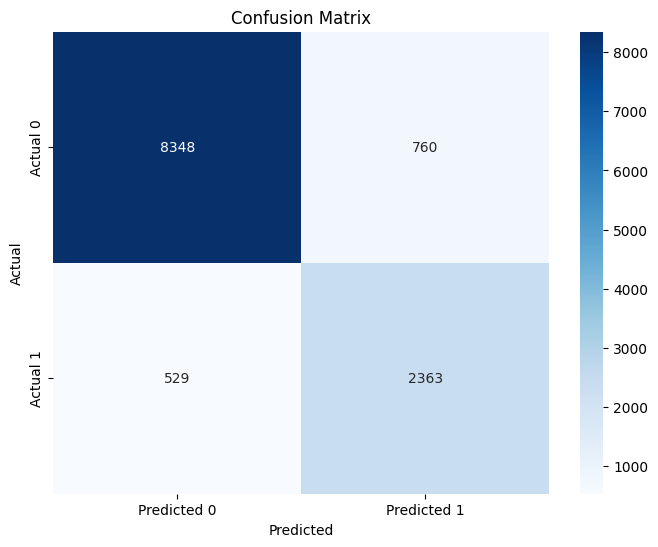

In [80]:
# KNN
knn_model = KNN(15)
knn_model.fit(x_train, y_train)
evaluate_model(knn_model, x_test, y_test)

Precision: 0.8498
Recall: 0.8195
F1-Score: 0.8344

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9108
           1       0.85      0.82      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



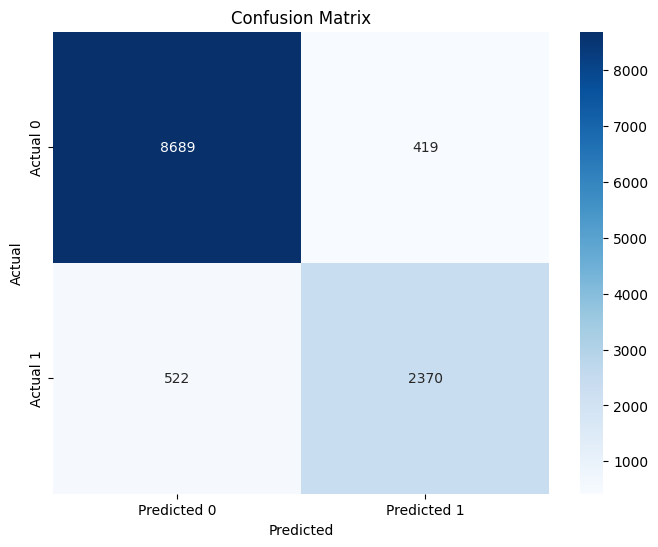

In [ ]:
# Random Forest
with open('models/random_forest_20.pkl', 'rb') as f:
    random_forest = pickle.load(f)
evaluate_model(random_forest, x_test, y_test)

Precision: 0.8005
Recall: 0.8033
F1-Score: 0.8019

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9108
           1       0.80      0.80      0.80      2892

    accuracy                           0.90     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.90      0.90      0.90     12000



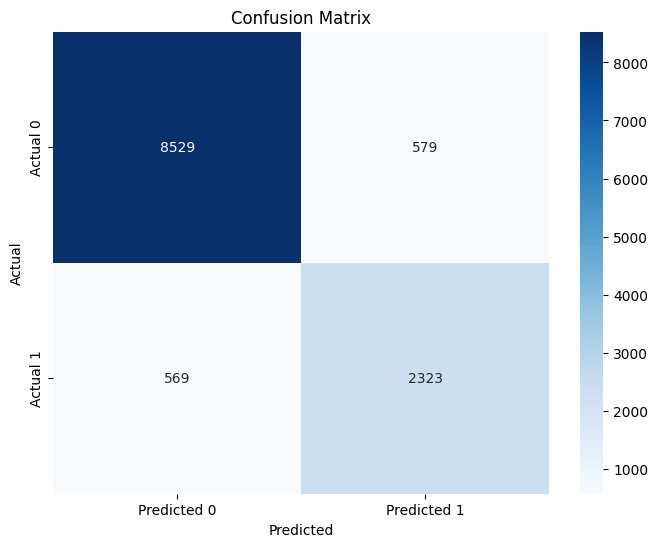

In [ ]:
# XGBoost
with open('models/bm_30.pkl', 'rb') as f:
    bm = pickle.load(f)
evaluate_model(bm, x_test, y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
Precision: 0.7786
Recall: 0.8572
F1-Score: 0.8160

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      9108
           1       0.78      0.86      0.82      2892

    accuracy                           0.91     12000
   macro avg       0.87      0.89      0.88     12000
weighted avg       0.91      0.91      0.91     12000



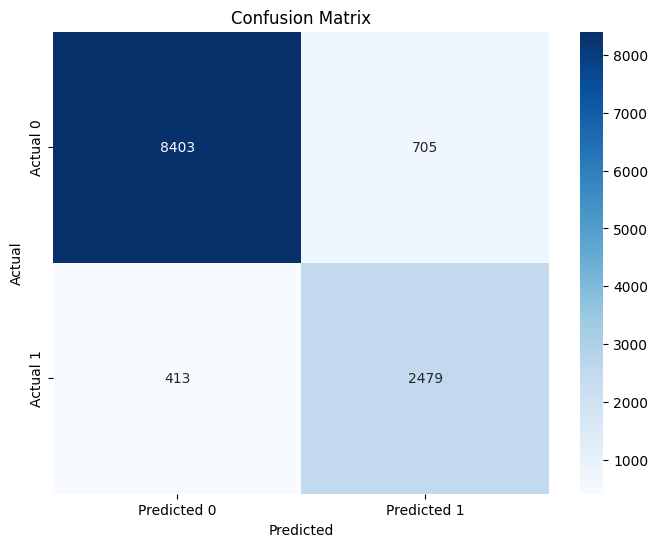

In [81]:
# Neural Network Model
dl_model = load_model("best_dl.keras")
evaluate_model(dl_model, x_test, y_test)

Precision: 0.8112
Recall: 0.8468
F1-Score: 0.8286

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9108
           1       0.81      0.85      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.88      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



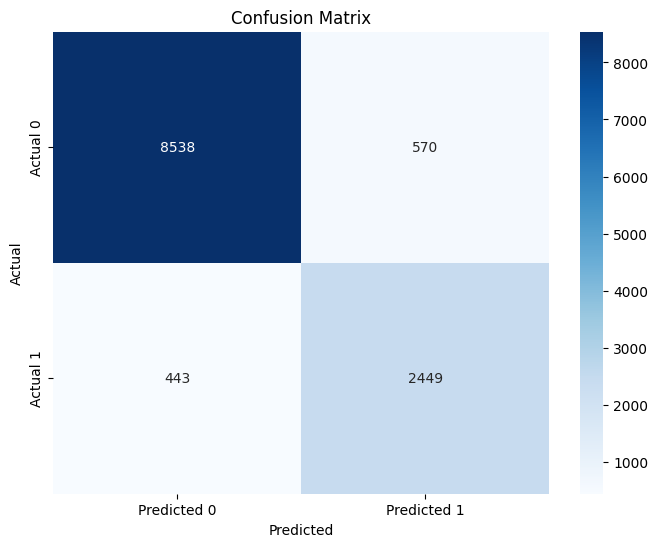

In [ ]:
# Bagging Neural Network
with open('models/bnn_30.pkl', 'rb') as f:
    bnn_model = pickle.load(f)

evaluate_model(bnn_model, x_test, y_test)

Precision: 0.8669
Recall: 0.8015
F1-Score: 0.8329

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9108
           1       0.87      0.80      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.90      0.88      0.89     12000
weighted avg       0.92      0.92      0.92     12000



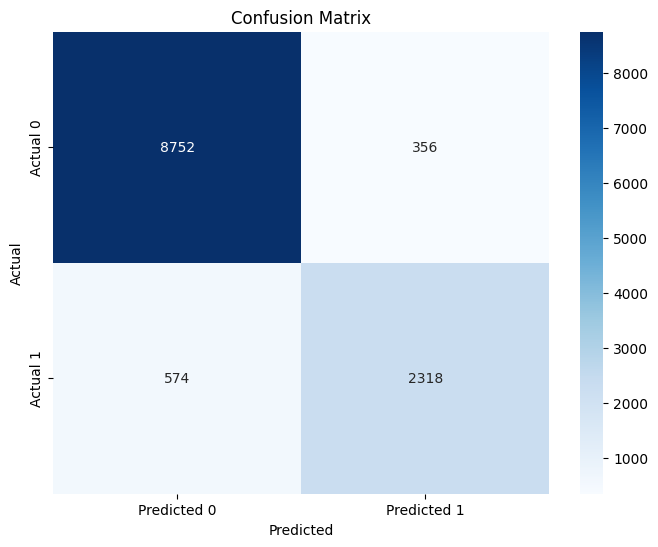

In [ ]:
# Stacking

# Random Forest
with open('models/random_forest_20.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Boosting Model
with open('models/bm_30.pkl', 'rb') as f:
    boosting_model = pickle.load(f)

# Bagging Neural Network Model
with open('models/bnn_30.pkl', 'rb') as f:
    bnn_model = pickle.load(f)

base_models = [
    ("Random Forest", rf_model),
    ("Bagging NN Model", bnn_model), 
    ("XGBoost", boosting_model)
]


# Define the meta model Logistic Regression
meta_model = LogisticRegression(learning_rate=0.1, n_iterations = 10000)

# Create an instance of the StackingModel class
stacking_model = StackingModel(base_models=base_models, meta_model=meta_model)

stacking_model.fit(x_val, y_val)
evaluate_model(stacking_model, x_test, y_test)


Soft Voting:
Precision: 0.8340
Recall: 0.8285
F1-Score: 0.8312

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9108
           1       0.83      0.83      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



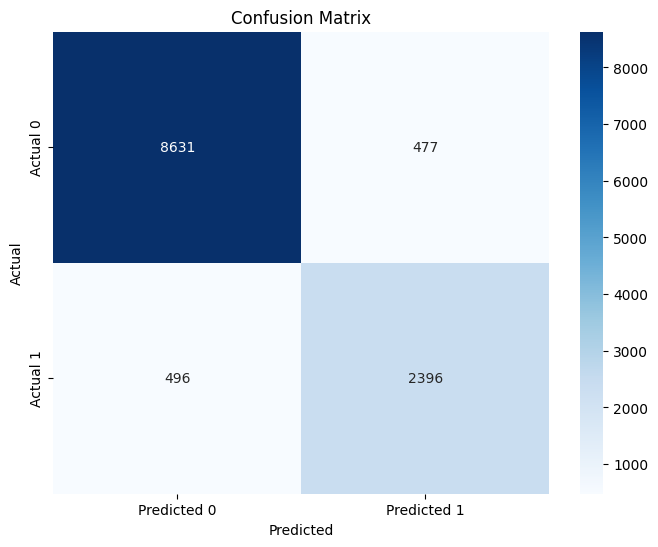


Hard Voting:
Precision: 0.8274
Recall: 0.8302
F1-Score: 0.8288

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9108
           1       0.83      0.83      0.83      2892

    accuracy                           0.92     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.92      0.92      0.92     12000



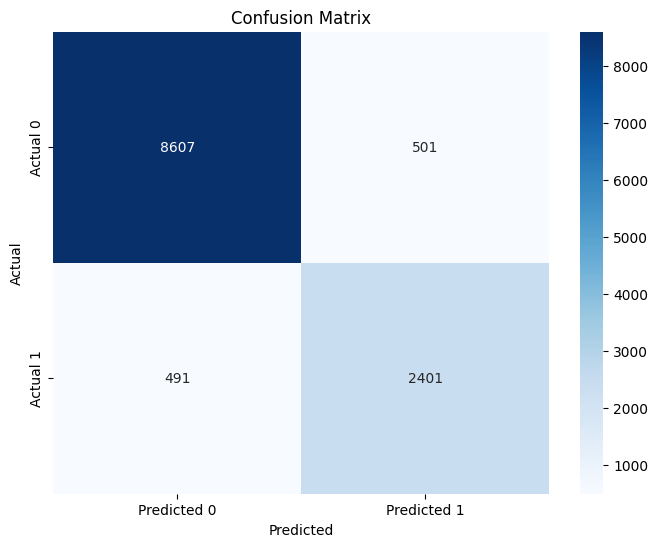

In [ ]:
# Voting

# Random Forest
with open('models/random_forest_20.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Boosting Model
with open('models/bm_30.pkl', 'rb') as f:
    boosting_model = pickle.load(f)

# Bagging Neural Network Model
with open('models/bnn_30.pkl', 'rb') as f:
    bnn_model = pickle.load(f)

base_models = [
    ("Random Forest", rf_model),
    ("Bagging NN Model", bnn_model), 
    ("XGBoost", boosting_model)
]


soft_voting_model = VotingModel(base_models=base_models, voting='soft')
hard_voting_model = VotingModel(base_models=base_models, voting='hard')

print("\nSoft Voting:")
evaluate_model(soft_voting_model, x_test, y_test)

print("\nHard Voting:")
evaluate_model(hard_voting_model, x_test, y_test)